<a href="https://colab.research.google.com/github/mitaliyadav/Movie-Recommender/blob/main/movie_rec_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install tensorflow[and-cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.4/979.4 kB 40.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.9 MB/s eta 0:00:00
   

In [ ]:
 tf. __version__

'2.15.0'

In [ ]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.metrics import ndcg_score
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tqdm import trange

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
user_ratings = pd.read_csv('/content/master_data.csv')
#drop first column
user_ratings.drop(columns=['Unnamed: 0', 'imdbId', 'tmdbId', 'id', 'title_y'], axis=1, inplace=True)
user_ratings.rename({'title_x':'title', 'release_year':'year'}, axis=1, inplace=True)
display(user_ratings.shape)
user_ratings.head()

(5467680, 7)

,userId,movieId,rating,title,vote_average,vote_count,year
0,1,3889,4.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0
1,24,3889,2.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0
2,156,3889,4.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0
3,298,3889,3.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0
4,367,3889,2.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0


In [ ]:
master_movie_df = user_ratings['movieId'].value_counts().to_frame().reset_index().rename({'index':'movieId', 'movieId':'frequency'}, axis=1)
master_movie_list = master_movie_df.movieId.to_list()
len(master_movie_list)

11298

In [ ]:
movie_tags = pd.read_csv('/content/tags_ohe.csv')
#drop first column
movie_tags.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
movie_tags.head()

,movieId,nudity,scifi,based on a book,atmospheric,comedy,action,oscar,surreal,twist ending,...,funny,quirky,dystopia,classic,stylized,dark comedy,romance,fantasy,psychology,time travel
0,26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,51,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#movie_genre = pd.read_csv('/content/genres_user.csv')

In [ ]:
"""
user_movie = user_ratings.merge(right= movie_genre, how='inner', on='movieId').drop(['title','vote_average','vote_count','year'], axis=1)
user_movie.dropna(inplace=True)
display(user_movie.shape)
user_movie.head()
"""

"\nuser_movie = user_ratings.merge(right= movie_genre, how='inner', on='movieId').drop(['title','vote_average','vote_count','year'], axis=1)\nuser_movie.dropna(inplace=True)\ndisplay(user_movie.shape)\nuser_movie.head()\n"

 # Part 1: Neural Network and Embedding Layer

In [ ]:
import tensorflow as tf
from tensorflow import keras
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.utils import split_dataset
from sklearn.model_selection import train_test_split

In [ ]:
movie_agg_train, movie_agg_test = train_test_split(movie_tags, train_size=0.8, test_size=0.2, shuffle=True)
user_agg_train, user_agg_test = train_test_split(user_ratings, train_size=0.5, test_size=0.2, shuffle=True)
type(movie_agg_train)

pandas.core.frame.DataFrame

In [ ]:
hidden_units = (28,4)
movie_embedding_size = 21
user_embedding_size = 7

# Each instance will consist of two inputs: a single user id, and a single movie id
user_id_input = keras.Input(shape=(1,), name='userId')
movie_id_input = keras.Input(shape=(1,), name='movieId')
user_embedded = keras.layers.Embedding(user_ratings.userId.max()+1, user_embedding_size,
                                       input_length=1, name='user_embedding')(user_id_input)
movie_embedded = keras.layers.Embedding(movie_tags.movieId.max()+1, movie_embedding_size,
                                        input_length=1, name='movie_embedding')(movie_id_input)
# Concatenate the embeddings (and remove the useless extra dimension)
concatenated = keras.layers.Concatenate()([user_embedded, movie_embedded])
out = keras.layers.Flatten()(concatenated)

# Add one or more hidden layers
for n_hidden in hidden_units:
    out = keras.layers.Dense(n_hidden, activation='relu')(out)

# A single output: our predicted rating
out = keras.layers.Dense(1, activation='linear', name='prediction')(out)

model = keras.Model(
    inputs = [user_id_input, movie_id_input],
    outputs = out,
)
model.summary(line_length=88)

Model: "model"
________________________________________________________________________________________
 Layer (type)             Output Shape              Param    Connected to               
                                                    #                                   
 userId (InputLayer)      [(None, 1)]               0        []                         
                                                                                        
 movieId (InputLayer)     [(None, 1)]               0        []                         
                                                                                        
 user_embedding (Embeddi  (None, 1, 7)              969458   ['userId[0][0]']           
 ng)                                                                                    
                                                                                        
 movie_embedding (Embedd  (None, 1, 21)             977680   ['movieId[0][0]']          
 ing) 

In [ ]:
model.compile(
    # Technical note: when using embedding layers, I highly recommend using one of the optimizers
    # found  in tf.train: https://www.tensorflow.org/api_guides/python/train#Optimizers
    # Passing in a string like 'adam' or 'SGD' will load one of keras's optimizers (found under
    # tf.keras.optimizers). They seem to be much slower on problems like this, because they
    # don't efficiently handle sparse gradient updates.
    tf.optimizers.Adam(0.005),
    loss='MSE',
    metrics=['MAE'],
)

In [ ]:
history = model.fit(
    [user_agg_train.userId, user_agg_train.movieId],
    user_agg_train.rating,
    batch_size=5000,
    epochs=20,
    verbose=0,
    validation_split=.05,
);

In [ ]:
model.save('/content/model.keras')

In [ ]:
# Save training history for later comparison
hdf = pd.DataFrame(dict(
    epoch=history.epoch,
    val_mae=history.history['val_MAE'],
    train_mae=history.history['MAE'],
))
hdf.to_csv('history-1.csv')


In [ ]:
model = keras.models.load_model('/content/model.keras')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

def get_metrics(y_true, y_pred):
    return metrics.mean_absolute_error(y_true, y_pred), metrics.mean_squared_error(y_true, y_pred)

mean_rating = user_agg_train['rating'].mean()
print("Average rating in training set is {:.2f} stars".format(mean_rating))

y_true = user_agg_test['rating'].values
always_mean = np.full(y_true.shape, mean_rating)

mae, mse = get_metrics(y_true, always_mean)
print("Always predicting global average rating results in Mean Absolute Error={:.2f}, Mean Squared Error={:.2f}".format(
    mae, mse))

movies = user_ratings.copy().set_index('movieId')

mean_per_movie = user_agg_train.groupby('movieId')['rating'].mean()
movies['mean_rating'] = mean_per_movie
ratings_per_movie = user_agg_train.groupby('movieId').size()
movies['n_ratings'] = ratings_per_movie
# There are a few movies in the validation set not present in the training set. We'll just use the global
# mean rating in their case.
display(movies.head())
y_movie_mean = user_agg_test.join(mean_per_movie, on='movieId', rsuffix='mean')['ratingmean'].fillna(mean_rating).values

mae, mse = get_metrics(y_true, y_movie_mean)
print("Predicting mean per movie results in Mean Absolute Error={:.2f}, Mean Squared Error={:.2f}".format(mae, mse))

Average rating in training set is 3.50 stars
Always predicting global average rating results in Mean Absolute Error=0.79, Mean Squared Error=1.05


,userId,rating,title,vote_average,vote_count,year,mean_rating,n_ratings
movieId,,,,,,,,
3889,1,4.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0,2.444444,630.0
3889,24,2.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0,2.444444,630.0
3889,156,4.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0,2.444444,630.0
3889,298,3.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0,2.444444,630.0
3889,367,2.0,Highlander: Endgame (Highlander IV) (2000),4.8,376,2000.0,2.444444,630.0


Predicting mean per movie results in Mean Absolute Error=0.71, Mean Squared Error=0.86


In [ ]:
movies.shape

(5467680, 8)

AttributeError: 'NoneType' object has no attribute 'epoch'

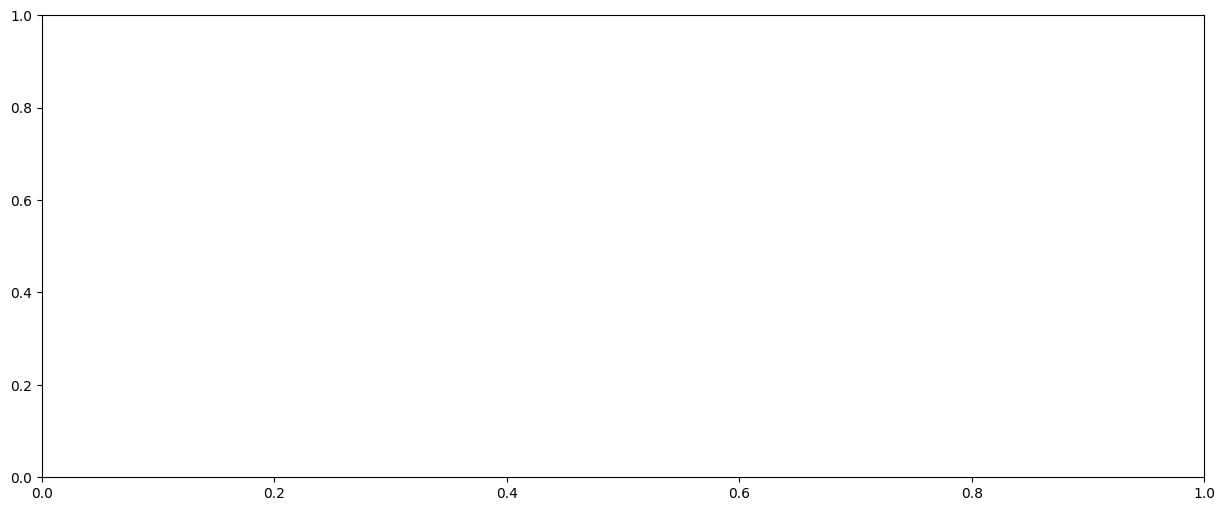

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(history.epoch, history.history['val_MAE'], label='Validation MAE')
ax.plot(history.epoch, history.history['MAE'], label='Training MAE')
ax.set_xlabel('Epoch')
ax.set_ylabel('Mean Absolute Error')
ax.set_xlim(left=0, right=history.epoch[-1])
baseline_mae = 0.73
ax.axhline(baseline_mae, ls='--', label='Baseline', color='#002255', alpha=.5)
ax.grid()
fig.legend();

In [ ]:
#
ratings_per_user = user_ratings.groupby('userId').size()
uid = ratings_per_user[ratings_per_user < 30].sample(1, random_state=1).index[0]
user_ratings = user_ratings[user_ratings.userId==uid]
print("User #{} has rated {} movies (avg. rating = {:.1f}):".format(
    uid, len(user_ratings), user_ratings['rating'].mean(),
))
cols = ['userId', 'movieId', 'rating', 'title', 'year']
user_ratings.sort_values(by='rating', ascending=False)[cols]

User #382 has rated 13 movies (avg. rating = 4.2):


,userId,movieId,rating,title,year
299567,382,6502,5.0,28 Days Later (2002),2002.0
913056,382,3892,5.0,Anatomy (Anatomie) (2000),2000.0
2647993,382,5254,4.5,Blade II (2002),2002.0
3094541,382,7235,4.5,Ichi the Killer (Koroshiya 1) (2001),2001.0
4805711,382,6820,4.5,Ginger Snaps (2000),2000.0
134257,382,4720,4.0,"Others, The (2001)",2001.0
645459,382,3994,4.0,Unbreakable (2000),2000.0
905051,382,3863,4.0,"Cell, The (2000)",2000.0
1001639,382,4973,4.0,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",2001.0
4455667,382,5128,4.0,Queen of the Damned (2002),2002.0


In [ ]:
candidate_movies = movies[movies["title"].str.contains("Naked Gun |The Sisterhood of the Traveling Pants |Lilo & Stitch")].copy()

preds = model.predict([
    pd.Series([uid] * len(candidate_movies)), # User ids
    candidate_movies.index, # Movie ids
])
# values, by adding the mean back
row = user_ratings.iloc[0] # The difference between rating and y will be the same for all rows, so we can just use the first
y_delta = row.rating
candidate_movies['predicted_rating'] = preds
# Add a column with the difference between our predicted rating (for this user) and the movie's
# overall average rating across all users in the dataset.
candidate_movies['delta'] = candidate_movies['predicted_rating'] - candidate_movies['mean_rating']
candidate_movies.sort_values(by='delta', ascending=False)

145/145 [==============================] - 1s 2ms/step


,userId,rating,title,vote_average,vote_count,year,mean_rating,n_ratings,predicted_rating,delta
movieId,,,,,,,,,,
5444,11,4.5,Lilo & Stitch (2002),7.5,5784,2002.0,3.484089,2294.0,3.690274,0.206185
5444,88697,3.5,Lilo & Stitch (2002),7.5,5784,2002.0,3.484089,2294.0,3.690274,0.206185
5444,88807,3.5,Lilo & Stitch (2002),7.5,5784,2002.0,3.484089,2294.0,3.690274,0.206185
5444,88798,4.0,Lilo & Stitch (2002),7.5,5784,2002.0,3.484089,2294.0,3.690274,0.206185
5444,88795,4.0,Lilo & Stitch (2002),7.5,5784,2002.0,3.484089,2294.0,3.690274,0.206185
...,...,...,...,...,...,...,...,...,...,...
5444,107715,1.0,Lilo & Stitch (2002),7.5,5784,2002.0,3.484089,2294.0,3.690273,0.206184
5444,107720,4.0,Lilo & Stitch (2002),7.5,5784,2002.0,3.484089,2294.0,3.690273,0.206184
5444,125860,4.0,Lilo & Stitch (2002),7.5,5784,2002.0,3.484089,2294.0,3.690273,0.206184


# Creating recommendations for users

In [ ]:
# for existing users that have already rated movies before
# create list of already rated movies
# subtract from master_list of movies
# rate each movie
# create a dataframe of movieid and predicted rating
# sort by rating and return 10 highest rated movies

In [ ]:
# for intial users:
# ask for top 5 genres
# show them top 5 highest rated movies from each genre and ask to pick 10 movies
# based on the movies liked suggest 10 more movies

In [ ]:
#do for single user with prior ratings
def exp_user(myId):
  #myId = 11
  my_rating = user_ratings[user_ratings['userId']==myId]
  my_movies_rated = my_rating.movieId.to_list()
  movies_to_rate = list(set(master_movie_list)-set(my_movies_rated))

  #make_predictions
  prediction = model.predict([
      pd.Series([myId]*len(movies_to_rate)),
      pd.Series(movies_to_rate)
  ])
  my_predictions = pd.DataFrame({"movieId":movies_to_rate, "pred_rating":prediction.flatten()})
  my_predictions.sort_values(by=['pred_rating'], inplace=True, ascending=False)
  my_movies = my_predictions.iloc[:10, 0].to_list()

  suggesstions = movies[movies.index.isin(my_movies)]
  suggestions = suggesstions.drop_duplicates('title', keep='first').drop(columns=['userId','rating','n_ratings'], axis=1)
  return suggestions

In [ ]:
#give example here of previously existing user
myId = 382
exp_user(myId)

353/353 [==============================] - 2s 5ms/step


,title,vote_average,vote_count,year,mean_rating
movieId,,,,,
51088,Reno 911!: Miami (2007),5.8,228,2007.0,2.927397
27584,Dead End (2003),6.4,487,2003.0,3.292208
33376,"Tesseract, The (2003)",4.7,16,2003.0,1.900000
43906,Tamara (2005),5.2,241,2005.0,2.590909
62586,"American Carol, An (2008)",4.3,84,2008.0,2.241935
52730,It's a Very Merry Muppet Christmas Movie (2002),6.1,80,2002.0,2.916667
100010,Battle of Los Angeles (2011),3.6,99,2011.0,3.333333
106200,Hours (2013),6.6,714,2013.0,2.333333
100397,"ABCs of Death, The (2012)",4.9,551,2013.0,2.703704


In [ ]:
#knn_data to be used for cold users
knn_data = pd.read_csv('/content/knn_data.csv').drop(columns=['Unnamed: 0'], axis=1)
display(knn_data.head())
knn_data.shape

,movieId,rating_avg,num_votes,Documentary,Film-Noir,Mystery,Drama,Comedy,Fantasy,Western,...,Musical,Animation,Horror,Crime,Children,Sci-Fi,Thriller,Romance,title,genres
0,1,3.921240,49695,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.211977,22243,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.151040,12735,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,Grumpier Old Men (1995),Comedy|Romance
3,4,2.861393,2756,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.064592,12161,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,Father of the Bride Part II (1995),Comedy


(9259, 23)

In [ ]:
#genre_list
def top_movies_from_genres(genres_list):
  #takes a list of genres and returns the highest rated movies from each genre in dataframe
  final_movies = pd.DataFrame()
  for g in genres_list:
    genre_specific = knn_data[knn_data[g] ==1].sort_values(by=['rating_avg'], ascending=False)
    genre_specific = genre_specific[genre_specific['rating_avg'] > 3.5]
    genre_specific['total_score'] = genre_specific['rating_avg'] * np.log(genre_specific['num_votes'])
    genre_specific = genre_specific.sort_values(by=['total_score'], ascending=False).iloc[:5,:]
    final_movies = pd.concat([final_movies, genre_specific])
  return final_movies

# finding a similarity score
credit_df = pd.read_csv('/content/movies_with_credit_2.csv', lineterminator='\n').drop(columns=['Unnamed: 0'], axis=1)

credit_df['actors'] = [credit_df.iloc[i, 5:8].to_list() for i in range(credit_df.shape[0])]
credit_df['genres'] = credit_df['genres'].apply(lambda x: x.split(sep='|'))
credit_df.drop(columns=['actor_1','actor_2','actor_3'], axis=1, inplace=True)
#Construct a reverse map of indices and movie titles
indices = pd.Series(credit_df.index, index=credit_df['title']).drop_duplicates()
display(credit_df.head())
display(indices.head())

,movieId,imdbId,tmdbId,title,genres,production,revenue,overview,actors
0,1,114709,862.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",pixar,394400000,"Led by Woody, Andy's toys live happily in his ...","[tom hanks, tim allen, don rickles]"
1,2,113497,8844.0,Jumanji,"[Adventure, Children, Fantasy]",tristar pictures,262821940,When siblings Judy and Peter discover an encha...,"[robin williams, kirsten dunst, bradley pierce]"
2,3,113228,15602.0,Grumpier Old Men,"[Comedy, Romance]",lancaster gate,71500000,A family wedding reignites the ancient feud be...,"[walter matthau, jack lemmon, ann-margret]"
3,4,114885,31357.0,Waiting to Exhale,"[Comedy, Drama, Romance]",20th century fox,81452156,"Cheated on, mistreated and stepped on, the wom...","[whitney houston, angela bassett, loretta devine]"
4,5,113041,11862.0,Father of the Bride Part II,[Comedy],touchstone pictures,76594107,Just when George Banks has recovered from his ...,"[steve martin, diane keaton, martin short]"


title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
credit_df['overview'] = credit_df['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(credit_df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.01532337, 0.        , ..., 0.02037439, 0.        ,
        0.0242044 ],
       [0.01532337, 1.        , 0.04890963, ..., 0.01565061, 0.        ,
        0.        ],
       [0.        , 0.04890963, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02037439, 0.01565061, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0242044 , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return credit_df['title'].iloc[movie_indices]
get_recommendations('Toy Story')

15401                    Toy Story 3
3027                     Toy Story 2
10347        40-Year-Old Virgin, The
24460     Toy Story Toons: Small Fry
23818    Andy Hardy's Blonde Trouble
9834                 Amongst Friends
7785           Love Finds Andy Hardy
21421       Andy Hardy's Double Life
1081           Rebel Without a Cause
1957                       Condorman
Name: title, dtype: object

In [ ]:
#give example
all_genres = ['Documentary','Film-Noir', 'Mystery', 'Drama', 'Comedy', 'Fantasy', 'Western', 'Action', 'Adventure', 'War', 'Musical', 'Animation', 'Horror', 'Crime', 'Children', 'Sci-Fi', 'Thriller', 'Romance']
genre_list = [ 'Mystery', 'Drama', 'Comedy', 'Fantasy', 'Western']
display(top_movies_from_genres(genre_list))

,movieId,rating_avg,num_votes,Documentary,Film-Noir,Mystery,Drama,Comedy,Fantasy,Western,...,Animation,Horror,Crime,Children,Sci-Fi,Thriller,Romance,title,genres,total_score
895,912,4.258327,24349,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,Casablanca (1942),Drama|Romance,43.010149
2244,2329,4.151208,23309,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,American History X (1998),Crime|Drama,41.747014
109,111,4.110576,24481,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,Taxi Driver (1976),Crime|Drama|Thriller,41.540048
8278,8961,3.908572,19890,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,38.686939
57,58,3.978396,11549,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,37.215329
315,318,4.446990,63366,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,"Shawshank Redemption, The (1994)",Crime|Drama,49.168963
523,527,4.310175,50054,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,Schindler's List (1993),Drama|War,46.639790
49,50,4.334372,47006,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,46.629309
293,296,4.174231,67310,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,46.405195
843,858,4.364732,41355,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,"Godfather, The (1972)",Crime|Drama,46.396879


In [ ]:
#create a list of selected movies
movie_list = ['Toy Story 3', 'American History X', 'Memento', 'Rebel Without a Cause']
for movie in movie_list:
  display(get_recommendations(movie))

0                          Toy Story
3027                     Toy Story 2
10347        40-Year-Old Virgin, The
23818    Andy Hardy's Blonde Trouble
21421       Andy Hardy's Double Life
9834                 Amongst Friends
7785           Love Finds Andy Hardy
15773             Christmas Toy, The
3087                 Man on the Moon
10011                  Life Is Sweet
Name: title, dtype: object

14012                       Obsessed
12644                   Blind Dating
23521                       Occupant
4720                       Zoolander
4789            Domestic Disturbance
23686                    Watercolors
10951    Brotherhood of Justice, The
14715                Bart Got a Room
8126                 Danny Deckchair
16764                     Glitterbug
Name: title, dtype: object

4031                                        Leonard Part 6
8129                                                  Novo
7062                                         Teacher's Pet
6491                                           Big Trouble
9957     National Lampoon's Lady Killers (National Lamp...
26543                                    Act of Aggression
19405                                     Family Tree, The
7181                                        50 First Dates
3205                                        Big Combo, The
1302                                           Audrey Rose
Name: title, dtype: object

21545             Date with Judy, A
24460    Toy Story Toons: Small Fry
0                         Toy Story
1493        Designated Mourner, The
3682                    House Party
17606               Fred: The Movie
3683                  House Party 2
10634                         Lorna
5242             Husbands and Wives
13075          Lost Boys: The Tribe
Name: title, dtype: object

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

['Comedy', 'Drama', 'Romance']

In [ ]:
"""knn_data_with_credit = pd.get_dummies(
    data=knn_data_with_credit,
    columns=["actor_1", "actor_2", "actor_3"],
    prefix=["actor", "actor", "actor"])
display(knn_data_with_credit.head(),
        knn_data_with_credit.shape,
        knn_data_with_credit.isnull().sum())"""

In [ ]:
#using kmeans
X = knn_data.drop(columns=['Unnamed: 0', 'movieId','rating_avg', 'num_votes', 'title', 'genres'], axis=1, inplace=False)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# You just want the first two principal components
pca = PCA()

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pd.DataFrame(pca.fit_transform(X_std), columns=X.columns)
pca_components

,Documentary,Film-Noir,Mystery,Drama,Comedy,Fantasy,Western,Action,Adventure,War,Musical,Animation,Horror,Crime,Children,Sci-Fi,Thriller,Romance
0,4.964464,1.270421,1.472608,0.266931,0.620696,-0.499978,-0.249023,-0.503342,1.500153,0.623793,-2.262216,1.817426,0.554685,-0.556960,0.716132,-1.576334,-2.058993,-0.760898
1,0.209425,-1.597905,-0.916150,0.442825,-1.718041,-0.331643,-0.227759,0.439223,0.257538,0.602550,-0.400669,-0.705195,-1.026886,-0.040222,0.064635,-0.011678,0.026184,-0.301035
2,-0.347825,-2.003474,0.124552,0.476848,-1.332702,-0.962700,-0.270110,0.340383,0.212328,0.040196,-0.571386,-0.647077,-0.703280,0.022964,0.012446,0.035278,0.020092,0.893074
3,0.254287,-0.794689,-1.127495,0.133484,-0.774265,0.480647,-0.158323,-0.615572,0.378516,0.128436,0.478301,0.074879,0.438502,-0.134246,-0.319002,-0.145575,0.256550,-0.307891
4,-1.234968,2.956273,1.026189,0.363359,-1.473040,1.921799,-0.812099,-0.375877,-1.388574,-0.193430,0.253501,0.685528,-1.327939,0.292927,-0.224673,0.150177,-0.380863,-0.463681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,0.254287,-0.794689,-1.127495,0.133484,-0.774265,0.480647,-0.158323,-0.615572,0.378516,0.128436,0.478301,0.074879,0.438502,-0.134246,-0.319002,-0.145575,0.256550,-0.307891
9255,0.254287,-0.794689,-1.127495,0.133484,-0.774265,0.480647,-0.158323,-0.615572,0.378516,0.128436,0.478301,0.074879,0.438502,-0.134246,-0.319002,-0.145575,0.256550,-0.307891
9256,0.254287,-0.794689,-1.127495,0.133484,-0.774265,0.480647,-0.158323,-0.615572,0.378516,0.128436,0.478301,0.074879,0.438502,-0.134246,-0.319002,-0.145575,0.256550,-0.307891
9257,-0.099962,-0.232170,-0.458999,-0.239138,0.385437,0.261585,0.042160,-0.186310,0.160280,-0.177149,0.103396,0.079556,0.075973,-0.175024,-0.120503,0.133860,0.053435,-1.410459


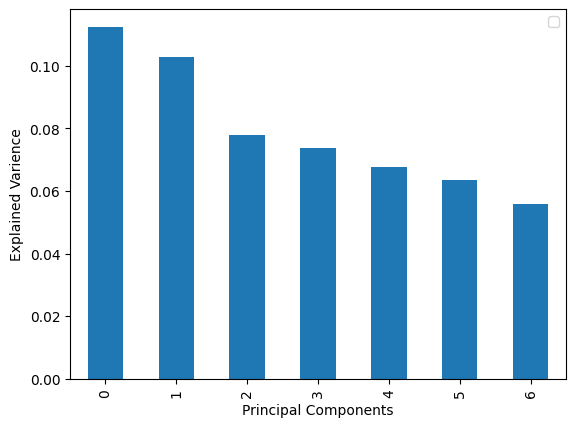

In [ ]:
#we have 20 genres
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

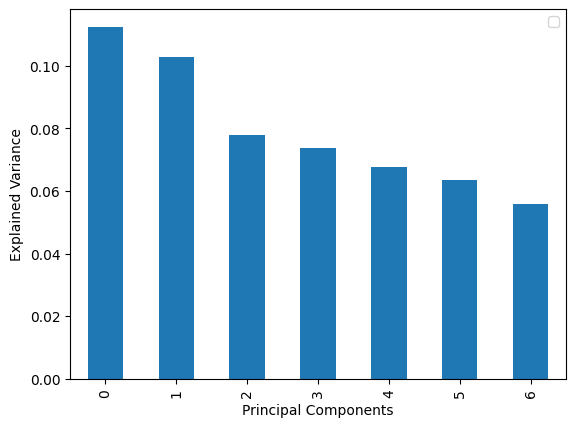

In [ ]:
# You just want the first two principal components for visualization
pca = PCA(n_components=2)

# Get the components by
# calling `fit_transform()` method with the data
pca_components = pd.DataFrame(pca.fit_transform(X_std))
pca_components.iloc[1, 0]

pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance');

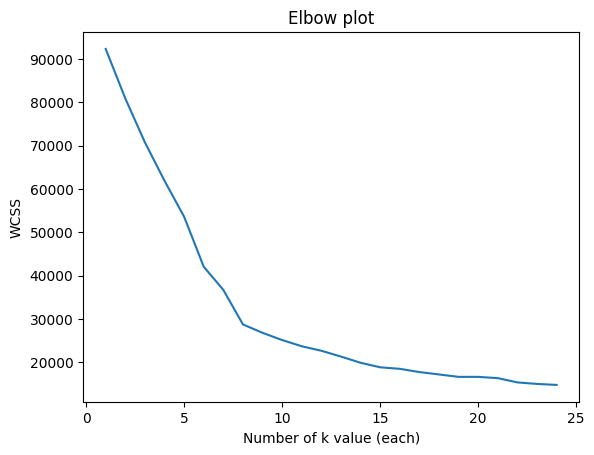

In [ ]:
#k-means clustering - taking 17 components
#scaler = StandardScaler()
cdf = pca_components
wcss = []

for each in range(1, 25):
    kmeans = KMeans(n_clusters=each, n_init='auto', max_iter=1000, random_state=42)
    kmeans.fit(cdf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 25), wcss)
plt.title('Elbow plot')
plt.xlabel("Number of k value (each)")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#we will be using k=7
n_clusers = 7
model = KMeans(
    n_clusters=n_clusers,
    n_init='auto',
    max_iter=1000,
    random_state=42
)
cluster_k = model.fit_predict(cdf)


with_km_df = pd.DataFrame(
    cdf, columns=pca_components.columns, index=pca_components.index)
with_km_df['cluster'] = cluster_k
display(with_km_df.head())
with_km_df['cluster'].value_counts(ascending=True)
print(metrics.silhouette_score(with_km_df, with_km_df['cluster'], metric='euclidean'))

,0,1,2,3,4,5,6,cluster
0,4.965100,1.271602,1.471503,0.267947,0.613890,-0.487849,-0.252268,5
1,0.209728,-1.597369,-0.916612,0.443238,-1.721430,-0.323919,-0.229715,1
2,-0.348777,-2.005221,0.126243,0.475272,-1.322953,-0.983896,-0.260961,1
3,0.254631,-0.794071,-1.128056,0.133998,-0.777678,0.489379,-0.161788,1
4,-1.234526,2.957088,1.025459,0.363981,-1.476910,1.935279,-0.818993,4


0.4135957297873642


#  Part 2: Random Forest for Tags

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Split the data into features (X) and target (y)
X = user_movie.drop('rating', axis=1)
y = user_movie['rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestRegressor(n_estimators= 100, max_features= 'sqrt', verbose=2, random_state= True, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.3s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    7.5s finished


In [ ]:
y_pred

array([2.6  , 2.695, 2.6  , ..., 4.615, 3.53 , 4.325])